# pandas 데이터 조작

- 데이터 집계
    - 빈도, 비율, 합계, 평균, 최대값, 최소값 등
- 데이터 정렬
- 결측치 처리
- apply()
- 데이터 범주화
- 인덱스 변경

In [260]:
# 모듈 import
import numpy as np
import pandas as pd

In [261]:
# 설정 변경 코드
# 변수 명이 두번 이상 출력되어도 모두 콘솔에서 보여줄 것
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# InteractiveShell.ast_node_interactivity : 'all' | 'last' | 'last_expr' | 'none' (기본값은 'last_expr')

# 데이터 집계

## 1. 데이터 개수 세기

- count() 함수 
    - NaN값은 세지 않음

- value_count() 함수

### 시리즈에 count()적용하여 개수 세기

In [262]:
# 시리즈 생성
s = pd.Series(range(10))
s[3] = np.nan   # 결측치 nan을 이용하여 NaN 저장
s

0    0.0
1    1.0
2    2.0
3    NaN
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [263]:
# 시리즈 개수 세기
s.count()

9

### 데이터 프레임에 count()함수 적용
- 각 열마다 데이터 개수를 세기 때문에 누락된 부분을 찾을 때 유용

**난수 발생시켜 데이터프레임 생성**

- 참고. 난수 생성
    - seed(값) 함수 사용하여 동일한 난수 발생
        - seed : 난수 알고리즘에서 사용하는 기본 값
        - seed 값이 같으면 동일한 난수 발생
        - 예. np.random.seed(10) 

    - 계속 변경되는 난수를 생성하려면 time.time()을 사용하여 시드값이 매번 변하도록 지정
        - 예. np.random.seed(int(time.time()))

In [264]:
# 고정 시드값
np.random.seed(20)
np.random.randint(5, size = 4)

array([3, 2, 4, 2])

In [265]:
# 변경 시드값
import time

np.random.seed(int(time.time()))

In [266]:
np.random.randint(5, size = 4)

array([3, 4, 0, 3])

- 4행 4열 실수형 데이터를 갖는 데이터 프레임 생성
    - 데이터 0~4범위의 난수 발생

In [267]:
np.random.seed(3)
df1 = pd.DataFrame(np.random.randint(5, size = (4, 4))) # 여기 수정
df1

,0,1,2,3
0,2,0,1,3
1,0,0,0,3
2,2,3,1,1
3,2,0,4,4


In [268]:
df1.count()

0    4
1    4
2    4
3    4
dtype: int64

=> 데이터 프레임이므로 각 열의 원소의 갯수를 시리즈 형태로 반환

In [269]:
# NaN 부여
df1.iloc[2, 3] = np.nan
df1

,0,1,2,3
0,2,0,1,3.0
1,0,0,0,3.0
2,2,3,1,NaN
3,2,0,4,4.0


In [270]:
df1.count()

0    4
1    4
2    4
3    3
dtype: int64

**실전 데이터에 count() 적용**

- 타이타닉 승객 데이터 사용
    - seaborn 패키지 내에 data로 존재
    - 데이터셋 읽어오기 : 패키지명.load_dataset("data명")

In [271]:
import seaborn as sns # seaborn 패키지 : 그래프 패키지

titanic = sns.load_dataset('titanic')
titanic.head()
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [272]:
#titanic df의 각 열의 원소 개수를 산출 - count() 함수 이용

titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

###  카테고리 값 세기 

- 시리즈, 데이터프레임의 범주형 데이터에 대한 **범주별 빈도(비율) 계산**
- **value_counts( )** 함수 적용

#### 시리즈 데이터의 빈도 계산
- 시리즈의 값이 정수,문자열 등 카테고리 값인 경우에
- 시리즈.value_counts()메서드를 사용해 각각의 값이 나온 횟수를 셀 수 있음
- 파라미터 normalize=True 를 사용하면 각 값 및 범주형 데이터의 비율을 계산
    - 시리즈.value_counts(normalize=True)

In [273]:
# 항상 같은 값이 나오도록 생성
np.random.seed(1)

In [274]:
# 데이터 마지막 부분 확인
s2 = pd.Series(np.random.randint(6, size=100))
s2

0     5
1     3
2     4
3     0
4     1
     ..
95    4
96    5
97    2
98    4
99    3
Length: 100, dtype: int32

In [275]:
# 데이터 길이
len(s2)

100

In [276]:
# 0,1,2,3,4,5 각 값이 몇번 나왔는지 확인
s2.value_counts()

1    22
0    18
4    17
5    16
3    14
2    13
dtype: int64

#### 범주형 데이터에 value_counts() 함수 적용
- 범주형 데이터 : 관측 별과가 몇개의 버무 또는 항목의 형태로 나타나는 자료
    - ex. 성별(남,여), 선호도(종다, 보통, 싫다), 혈액형(A,B,O,AB) 등

In [277]:
# titanic df 의 alive 열 : 생존여부가 yes/no 로 표시 되어 있음
# 문자열(Object type)
titanic['alive'].dtype
#
titanic['alive'].value_counts()

dtype('O')

no     549
yes    342
Name: alive, dtype: int64

In [278]:
# 생존자 사망자 비율 계산
titanic['alive'].value_counts(normalize=True)
titanic['alive'].value_counts(normalize=True)*100

no     0.616162
yes    0.383838
Name: alive, dtype: float64

no     61.616162
yes    38.383838
Name: alive, dtype: float64

#### 데이터프레임에  value_counts()  함수 사용


- 행을 하나의 value로 설정하고 동일한 행이 몇번 나타났는지 반환
- 행의 경우가 인덱스로 개수된 값이 value로 표시되는 Series 반환

In [279]:
# 예제 df
df = pd.DataFrame(([2, 2], [4, 0], [4, 0], [6, 0]),
                   index = ['falcon', 'dog', 'cat', 'ant'],
                   columns = ['num_legs', 'num_wings'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0
cat,4,0
ant,6,0


In [280]:
df.value_counts()

num_legs  num_wings
4         0            2
2         2            1
6         0            1
dtype: int64

In [281]:
# 예제 df
df1

,0,1,2,3
0,2,0,1,3.0
1,0,0,0,3.0
2,2,3,1,NaN
3,2,0,4,4.0


In [282]:
df1.value_counts()    # NaN은 제외

0  1  2  3  
0  0  0  3.0    1
2  0  1  3.0    1
      4  4.0    1
dtype: int64

In [283]:
df1.value_counts().sort_index()
df1.value_counts().sort_index().shape
df1.value_counts().sort_index().index

0  1  2  3  
0  0  0  3.0    1
2  0  1  3.0    1
      4  4.0    1
dtype: int64

(3,)

MultiIndex([(0, 0, 0, 3.0),
            (2, 0, 1, 3.0),
            (2, 0, 4, 4.0)],
           names=[0, 1, 2, 3])

In [284]:
# column : 시리즈 -> value_count() 적용가능
df1[0].value_counts()
df1.iloc[2, 3] = np.nan
df1
df1[3].value_counts()

2    3
0    1
Name: 0, dtype: int64

,0,1,2,3
0,2,0,1,3.0
1,0,0,0,3.0
2,2,3,1,NaN
3,2,0,4,4.0


3.0    2
4.0    1
Name: 3, dtype: int64

## 2. 데이터 정렬 

- 데이터 정렬을 위한 정렬 함수 사용
- **sort_index()** : 인덱스를 기준으로 정렬
- **sort_value()** : 데이터 값을 기준으로 정렬

### 2-1. 시리즈 정렬

In [285]:
#예제 시리즈
s2

0     5
1     3
2     4
3     0
4     1
     ..
95    4
96    5
97    2
98    4
99    3
Length: 100, dtype: int32

In [288]:
# 결과 인덱스가 순서 없이 반환
s2.value_counts()

#인덱스 기준 정렬
s2.value_counts().sort_index()

1    22
0    18
4    17
5    16
3    14
2    13
dtype: int64

0    18
1    22
2    13
3    14
4    17
5    16
dtype: int64

In [289]:
#인덱스 기준 내림차순 정렬
s2.value_counts().sort_index(ascending = False)

5    16
4    17
3    14
2    13
1    22
0    18
dtype: int64

In [290]:
#값을 기준으로 오름차순 정렬
s2.value_counts().sort_values()

2    13
3    14
5    16
4    17
0    18
1    22
dtype: int64

In [291]:
#값을 기준으로 내림차순 정렬
s2.value_counts().sort_values(ascending = False)

1    22
0    18
4    17
5    16
3    14
2    13
dtype: int64

In [292]:
s2.sort_values()

57    0
38    0
39    0
85    0
28    0
     ..
71    5
40    5
46    5
11    5
0     5
Length: 100, dtype: int32

### 2-2. 데이터 프레임 정렬

- df.sort_values() : 특정열 값 기준 정렬
    - 데이터프레임은 2차원 배열과 동일하기 때문에
        - 정렬시 기준열을 줘야 한다. by 인수 사용 : 생략 불가
        - by = 기준열, by=[기준열1,기준열2]
    - 오름차순/내림차순 : ascending = True/False (생략하면 오름차순)
    
    
- df.sort_index() : DF의 INDEX 기준 정렬
    - 오름차순/내림차순 : ascending = True/False (생략하면 오름차순)

In [293]:
df1

,0,1,2,3
0,2,0,1,3.0
1,0,0,0,3.0
2,2,3,1,NaN
3,2,0,4,4.0


In [294]:
# df1.sort_values() #sort_values() missing 1 required positional argument: 'by'

In [295]:
df1.sort_values(by=0)

,0,1,2,3
1,0,0,0,3.0
0,2,0,1,3.0
2,2,3,1,NaN
3,2,0,4,4.0


In [296]:
df1.sort_values(by=0, ascending=False)

,0,1,2,3
0,2,0,1,3.0
2,2,3,1,NaN
3,2,0,4,4.0
1,0,0,0,3.0


In [297]:
#1열을 기준으로 정렬, 1열 값이 동일 할때는 2열값을 기준으로 정렬
df1.sort_values(by=[1, 2])

,0,1,2,3
1,0,0,0,3.0
0,2,0,1,3.0
3,2,0,4,4.0
2,2,3,1,NaN


In [298]:
# 예제 df 확인
df

,num_legs,num_wings
falcon,2,2
dog,4,0
cat,4,0
ant,6,0


In [299]:
df.sort_values(by='num_wings')

,num_legs,num_wings
dog,4,0
cat,4,0
ant,6,0
falcon,2,2


- 데이터프레임의 index를 기준으로 정렬

In [300]:
# 인덱스 기준 정렬
df.sort_index()

# 인덱스 기준 내림차순 정렬
df.sort_index(ascending=False)

,num_legs,num_wings
ant,6,0
cat,4,0
dog,4,0
falcon,2,2


,num_legs,num_wings
falcon,2,2
dog,4,0
cat,4,0
ant,6,0


---------------------------------------------------

### 연습문제 

1. 타이타닉 데이터에서 승객의 성별(sex) 인원수, 나이별(age) 인원수, 선실별(class) 인원수, 사망/생존(alive)인원수를 구하시오.

2. 성별 인원수는 인덱스 기준으로 정렬하고, 나이별 인원수는 값 기준으로 정렬하며, 나머지는 임의 기준으로 선정하여 정렬 하시오.

In [38]:
# 타이타닉 승객에 대하여 성별 인원수 구하기


female    314
male      577
Name: sex, dtype: int64

In [39]:
# 타이타닉 승객에 대하여 나이별 인원수 구하기


12.00     1
24.50     1
66.00     1
20.50     1
0.67      1
         ..
19.00    25
28.00    25
18.00    26
22.00    27
24.00    30
Name: age, Length: 88, dtype: int64

In [40]:
# 타이타닉 승객에 대하여 선실별 인원수 구하기
#파이썬에서는 형태 분류 class로 작업



numpy.int32

Third     491
Second    184
First     216
Name: class, dtype: int64

In [41]:
#타이타닉 승객에 대하여 사망/생존 인원수 구하기


no     549
yes    342
Name: alive, dtype: int64

In [42]:
#타이타닉 승객에 대하여 사망/생존 인원수 구하기
#.연산자 이용해서 data에 접근


no     549
yes    342
Name: alive, dtype: int64

------------------------------------------------------

## 3. 행/열의 합계

- **df.sum()** 함수 사용
- 행과 열의 합계를 구할때는 sum(axis=0/1) - axis는 0이 기본
    - 각 열의 합계를 구할때는 sum(axis=0)
    - 각 행의 합계를 구할때는 sum(axis=1)

**데이터 프레임 생성**

In [302]:
np.random.seed(1)
df2 = pd.DataFrame(np.random.randint(10, size=(4, 8)))
df2

,0,1,2,3,4,5,6,7
0,5,8,9,5,0,0,1,7
1,6,9,2,4,5,2,4,2
2,4,7,7,9,1,7,0,6
3,9,9,7,6,9,1,0,1


**각 행의 합계 계산**

In [303]:
# 각 행의 합계를 구할때는 sum(axis=1)
df2.sum(axis=1)
# 시리즈 형태로 반환

0    35
1    34
2    41
3    42
dtype: int64

**각 열의 합계 계산**

In [304]:
# 각 열의 합계를 구할때는 sum(axis=0)
df2.sum(axis=0)

0    24
1    33
2    25
3    24
4    15
5    10
6     5
7    16
dtype: int64

In [305]:
# axis인수 생략 : df.sum() : 기본값이 0이므로 열방향 합계를 구한다.
df2.sum()

0    24
1    33
2    25
3    24
4    15
5    10
6     5
7    16
dtype: int64

## 4. 평균, 최소값, 최대값

- 데이터프레임에 적용되는 집계 관련 함수
    - 평균 : mean(axis=0/1)
    - 최소값 : min(axis=0/1)
    - 최대값 : max(axis=0/1)

In [306]:
# 예제 DF 확인
df2

,0,1,2,3,4,5,6,7
0,5,8,9,5,0,0,1,7
1,6,9,2,4,5,2,4,2
2,4,7,7,9,1,7,0,6
3,9,9,7,6,9,1,0,1


In [307]:
# df의 기본 함수 : min(), max(), mean()
df2.mean(axis=0)
df2.min(axis=0)
df2.max(axis=0)

0    6.00
1    8.25
2    6.25
3    6.00
4    3.75
5    2.50
6    1.25
7    4.00
dtype: float64

0    4
1    7
2    2
3    4
4    0
5    0
6    0
7    1
dtype: int32

0    9
1    9
2    9
3    9
4    9
5    7
6    4
7    7
dtype: int32

In [308]:
# 각 행의 합계를 새로운 열로 추가
df2['RowSum']=df2.sum(axis=1)
df2

,0,1,2,3,4,5,6,7,RowSum
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42


In [309]:
#새로운 행 추가(loc 인덱서 사용이 가장 간단함)
#각 열의 합계를 구한후에 행으로 추가
#행 이름은 ColTotal

df2.loc['ColTotal'] = df2.sum(axis=0)
df2

,0,1,2,3,4,5,6,7,RowSum
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42
ColTotal,24,33,25,24,15,10,5,16,152


# 데이터 삭제

- drop() 함수

## 행 삭제
- df.drop('행이름',0) : 행삭제 
     - 행삭제 후 df로 결과를 반환
- 원본에 반영되지 않으므로  원본수정하려면 저장 해야 함

In [310]:
# 각 행의 합계 계산
df2

,0,1,2,3,4,5,6,7,RowSum
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42
ColTotal,24,33,25,24,15,10,5,16,152


In [311]:
# - df.drop('행이름',0) : 행삭제 
#     - 행삭제 후 df로 결과를 반환
df2.drop('ColTotal', 0)
df2   # 실행만 한거라서 다시 출력하면 그대로 남아있는 것

,0,1,2,3,4,5,6,7,RowSum
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42


,0,1,2,3,4,5,6,7,RowSum
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42
ColTotal,24,33,25,24,15,10,5,16,152


## 열 삭제
- df.drop('행이름',1) : 열 삭제
     - 행삭제 후 df로 결과를 반환
- 원본에 반영되지 않으므로  원본수정하려면 저장 해야 함

In [148]:
# df.drop('컬럼명(열이름)',1) 열삭제 - 삭제 후 df로 반환
# 원본반영안됨
df2.drop('RowSum', 1)
df2

,0,1,2,3,4,5,6,7
0,5,8,9,5,0,0,1,7
1,6,9,2,4,5,2,4,2
2,4,7,7,9,1,7,0,6
3,9,9,7,6,9,1,0,1
ColTotal,24,33,25,24,15,10,5,16


,0,1,2,3,4,5,6,7,RowSum
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42
ColTotal,24,33,25,24,15,10,5,16,152


# 결측치 처리

: **NaN 값 처리** 함수

- **df.dropna(axis=0/1)**
    - NaN값이 있는 열 또는 행을 삭제
    - 원본 반영되지 않음


- **df.fillna(0)**
    - NaN값을 정해진 숫자로 채움
    - 원본 반영 되지 않음

### 결측치 적용

In [150]:
# df3에 결측치 값 적용
df2.iloc[0, 0] = np.nan
df2

,0,1,2,3,4,5,6,7,RowSum
0,NaN,8,9,5,0,0,1,7,35
1,6.0,9,2,4,5,2,4,2,34
2,4.0,7,7,9,1,7,0,6,41
3,9.0,9,7,6,9,1,0,1,42
ColTotal,24.0,33,25,24,15,10,5,16,152


### 결측치 포함 행 삭제 : dropna()

In [152]:
# NaN이 포함된 행을 삭제
df2.dropna()   # df3.dropna(axis=0)과 같다
df2

,0,1,2,3,4,5,6,7,RowSum
1,6.0,9,2,4,5,2,4,2,34
2,4.0,7,7,9,1,7,0,6,41
3,9.0,9,7,6,9,1,0,1,42
ColTotal,24.0,33,25,24,15,10,5,16,152


,0,1,2,3,4,5,6,7,RowSum
0,NaN,8,9,5,0,0,1,7,35
1,6.0,9,2,4,5,2,4,2,34
2,4.0,7,7,9,1,7,0,6,41
3,9.0,9,7,6,9,1,0,1,42
ColTotal,24.0,33,25,24,15,10,5,16,152


### 결측치 포함 열 삭제 : dropna(axis=1)

In [153]:
#NaN이 포함된 열삭제
df2.dropna(axis=1)
df2

,1,2,3,4,5,6,7,RowSum
0,8,9,5,0,0,1,7,35
1,9,2,4,5,2,4,2,34
2,7,7,9,1,7,0,6,41
3,9,7,6,9,1,0,1,42
ColTotal,33,25,24,15,10,5,16,152


,0,1,2,3,4,5,6,7,RowSum
0,NaN,8,9,5,0,0,1,7,35
1,6.0,9,2,4,5,2,4,2,34
2,4.0,7,7,9,1,7,0,6,41
3,9.0,9,7,6,9,1,0,1,42
ColTotal,24.0,33,25,24,15,10,5,16,152


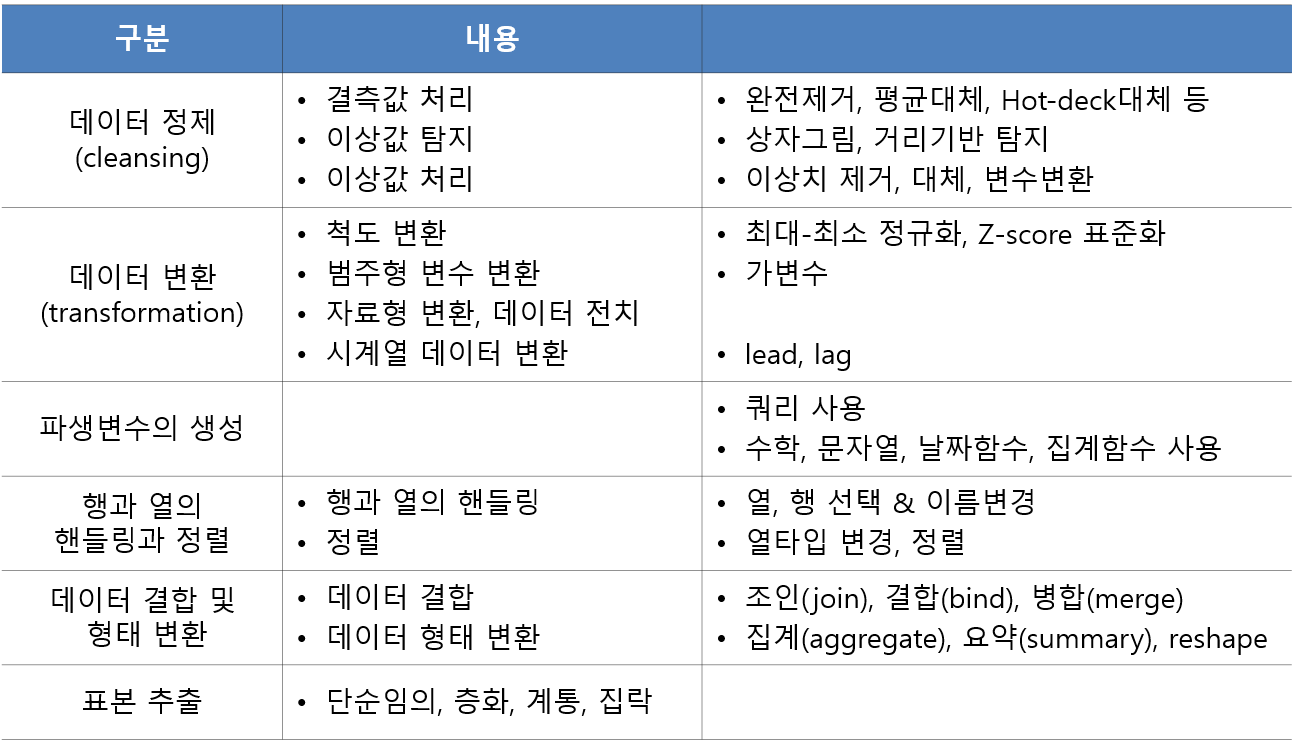

### 결측치를 다른 값으로 대체 : fillna() 함수

In [155]:
df2

,0,1,2,3,4,5,6,7,RowSum
0,NaN,8,9,5,0,0,1,7,35
1,6.0,9,2,4,5,2,4,2,34
2,4.0,7,7,9,1,7,0,6,41
3,9.0,9,7,6,9,1,0,1,42
ColTotal,24.0,33,25,24,15,10,5,16,152


**결측치를 0으로 변경**

In [156]:
df2[0].fillna(0)

0            0.0
1            6.0
2            4.0
3            9.0
ColTotal    24.0
Name: 0, dtype: float64

: fillna() 적용 후 결과값은 실수가 됨 (NaN이 실수형)

**결측치를 1로 변경**

In [157]:
df3.fillna(1)

,0,1,2,3,4,5,6,7,RowSum
0,1.0,8,9,5,0,0,1,7,35
1,6.0,9,2,4,5,2,4,2,34
2,4.0,7,7,9,1,7,0,6,41
3,9.0,9,7,6,9,1,0,1,42
ColTotal,24.0,33,25,24,15,10,5,16,152


In [158]:
# NaN 이 실수형이어서 fillna 후 결과값이 실수임
# 정수 변환 함수 astype(데이터형)
df2.fillna(0).astype(int)
df2.fillna(0).astype(float)

,0,1,2,3,4,5,6,7,RowSum
0,0,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42
ColTotal,24,33,25,24,15,10,5,16,152


,0,1,2,3,4,5,6,7,RowSum
0,0.0,8.0,9.0,5.0,0.0,0.0,1.0,7.0,35.0
1,6.0,9.0,2.0,4.0,5.0,2.0,4.0,2.0,34.0
2,4.0,7.0,7.0,9.0,1.0,7.0,0.0,6.0,41.0
3,9.0,9.0,7.0,6.0,9.0,1.0,0.0,1.0,42.0
ColTotal,24.0,33.0,25.0,24.0,15.0,10.0,5.0,16.0,152.0


# 행/열에 동일한 연산 적용

- 열 또는 행에 동일한 연산 반복 적용할 때


- apply() 함수
    - DataFrame의 행이나 열에 복잡한 연산을 vectorizing 할 수 있게 해주는 함수
    - 매우 많이 활용되는 함수


- **형식 : apply(반복적용할 함수, axis=0/1)**
    - 0 : 열마다 반복
    - 1 : 행마다 반복 
    - 생략시 기본값 : 0

**데이터프레임 생성**

In [159]:
# 예제 df 생성
df4 = pd.DataFrame({
    'a':[1,3,4,3,4],
    'b':[2,3,1,4,5],
    'c':[1,5,2,4,4]
})
df4

,a,b,c
0,1,2,1
1,3,3,5
2,4,1,2
3,3,4,4
4,4,5,4


**데이터프레임의 각 열에 sum() 함수 적용**

In [168]:
# df3의 각 열에 대해 np.sum 함수를 반복 적용
# sum함수는 열 또는 행단위로 적용되는 함수여서 각 열별로 적용 됨
# df3.sum(axis=0)
df3.apply(np.sum, 0)    # 시리즈 단위로 합계를 구하는 함수
# df3.apply(np.sum)

a    15
b    15
c    16
dtype: int64

**데이터프레임의 각 행에 sum() 함수 적용**

In [163]:
# df3의 각 행에 대해 np.sum 함수를 반복 적용
# sum함수는 열 또는 행단위로 적용되는 함수여서 각 행별로 적용 됨
# df3.sum(axis=0)
df3.apply(np.sum, 0)
# df3.apply(np.sum)

0     4
1    11
2     7
3    11
4    13
dtype: int64

**데이터프레임의 각 원소의 제곱값을 계산**

In [64]:
# df3의 각 열별 모든 원소에 대하여 np.square 함수 적용(제곱값)
# square 함수는 원소에 적용이 가능 한 함수이므로 열별로 원소에 대하여 벡터화 연산을 진행
# df3.sum(axis=1)
df3.apply(np.sum, 1)

,a,b,c
0,1,4,1
1,9,9,25
2,16,1,4
3,9,16,16
4,16,25,16


**데이터프레임의 행별로 각 원소의 제곱값을 계산**

In [169]:
# 행별 각 원소에 대하여  np.square 함수 연산을 진행 
## 원소에 대하여 진행하는 함수여서 열/행 모두 동일한 결과
df3.apply(np.square, 1)

,a,b,c
0,1,4,1
1,9,9,25
2,16,1,4
3,9,16,16
4,16,25,16


## 사용자가 정의한 연산을 행/열단위 적용 : lambda() & apply()

- 데이터프레임의 기본 집계함수(sum, min, max, mean 등)들은 행/열 단위 벡터화 연산을 수행함
    - apply() 함수를 사용할 필요가 없음


- apply() 함수 사용은 복잡한 연산을 해결하기 위한 lambda 함수나 사용자 정의 함수를 각 열 또는 행에 일괄 적용시키기 위해 사용
    - lambda 함수로 필요한 연산 기능을 구현하고, apply()를 통해 열/행 단위로 적용

### 1회성 함수 lambda 함수를  apply()에  사용하는 예제

- 집합데이터의 최대값과 최소값의 차이를 구하는 lambda 함수 정의

In [192]:
# 집합데이터의 최대값과 최소값의 차이를 구하는 lambda 함수
diff = lambda x : x.max() - x.min()

- 정의한 lambda함수 diif() 적용

In [193]:
# df3의 a열에 최대값과 최소값의 차이를 위에서 생성한 lambda 함수를 이용하여 구하시오
df3.apply(diff, 0)

a    3
b    4
c    4
dtype: int64

In [69]:
# apply 함수를 이용하여 위에서 생성한 lambda diff를 df3의 모든 행에 반복 적용하여 모든 행의 최대값과 최소값의 차이를 구하시오

df3.apply(diff, 1)

0    1
1    2
2    3
3    1
4    1
dtype: int64

- 직접 연산으로 통해 최대값과 최소값 차이 계산

In [180]:
# 다른 방법 : 직접 연산
# df3의 각 열에 대하여 최대값과 최소값의 차이를 구하시오

df3.max(axis = 1) - df3.min(axis=1)

0    1
1    2
2    3
3    1
4    1
dtype: int64

**데이터프레임 각 열의 데이터에 대한 범주별 빈도 계산**

In [182]:
# df3의 각 열의 데이터에 대해서 카테고리 세기를 수행하시오
df3

,a,b,c
0,1,2,1
1,3,3,5
2,4,1,2
3,3,4,4
4,4,5,4


In [188]:
# apply()함수를 사용해서 value_counts()적용 test
# df3['a'].value_counts()
df4.apply(pd.value_counts)

# a열 : 1 - 1번, 2 - 나타나지 않음(NaN), 3 - 2번, 4 2번 , 5 - 나타나지 않음(NaN)

,a,b,c
1,1.0,1,1.0
2,NaN,1,1.0
3,2.0,1,NaN
4,2.0,1,2.0
5,NaN,1,1.0


**각 열의 데이터에 대한 범주별 빈도 계산 후, NaN값은 0으로 변환하고 전체 데이터 타입을 정수로 변환**

In [189]:
# df3 각 열 데이터의 빈도를 세고, NaN값은 0으로 변환 전체 데이터 타입을 정수로 변환하시오.
df3.apply(pd.value_counts).fillna(0).astype(int)

,a,b,c
1,1,1,1
2,0,1,1
3,2,1,0
4,2,1,2
5,0,1,1


# 수치형 데이터를 범주형 데이터로 변환

: 데이터값을 카테고리 값으로 변환

- 값의 크기를 기준으로 하여 카테고리 값으로 변환하고 싶을때
    - **cut(data, bins, label)**
        - data : 구간 나눌 실제 값
        - bins : 구간 경계값
        - label: 카테고리 값
        
    - **qcut(data, bins, label)**

### 1. 구간 경계선을 선정하여 범주형 데이터로 변환 : cut()

#### 리스트 데이터를 범주형 데이터로 변환
**구간을 나눌 실제 값 : 관측 데이터**

In [190]:
ages=[0,0.5,4,6,4,5,2,10,21,23,37,15,38,31,61,20,41,31,100]

**구간 경계값, 범주 리벨 설정**

In [195]:
# 구간 경계값 설정
bins = [0, 4, 15, 25, 35, 60, 100]

In [197]:
#label : 카테고리 명
labels = ['영유아', '미성년자', '청년', '중년', '장년', '노년']

# 0 < 영유아 <= 4
# 4 < 미성년자 <= 15

**카테고리 생성 함수 cut() 적용**

In [199]:
# 함수 적용해서 카테고리 생성

catAge = pd.cut(ages, bins, labels=labels)
catAge
list(catAge)

[NaN, '영유아', '영유아', '미성년자', '영유아', ..., '노년', '청년', '장년', '중년', '노년']
Length: 19
Categories (6, object): ['영유아' < '미성년자' < '청년' < '중년' < '장년' < '노년']

[nan,
 '영유아',
 '영유아',
 '미성년자',
 '영유아',
 '미성년자',
 '영유아',
 '미성년자',
 '청년',
 '청년',
 '장년',
 '미성년자',
 '장년',
 '중년',
 '노년',
 '청년',
 '장년',
 '중년',
 '노년']

In [202]:
type(catAge)

pandas.core.arrays.categorical.Categorical

**참고: Categorical 클래스 객체**

- 카테고리명 속성 : Categorical.categories


- 코드 속성 : Categorical.codes 
    - 인코딩한 카테고리 값을 정수로 갖음

In [203]:
catAge.categories

Index(['영유아', '미성년자', '청년', '중년', '장년', '노년'], dtype='object')

In [205]:
catAge.codes

# -1로 나오는 데이터는 결측치를 나타냄

array([-1,  0,  0,  1,  0,  1,  0,  1,  2,  2,  4,  1,  4,  3,  5,  2,  4,
        3,  5], dtype=int8)

### 데이터프레임 데이터를 범주형으로 변환

In [312]:
# age 리스트를 이용해서 df 생성
df4 = pd.DataFrame(ages, columns=['age'])
df4

,age
0,0.0
1,0.5
2,4.0
3,6.0
4,4.0
5,5.0
6,2.0
7,10.0
8,21.0
9,23.0


In [80]:
df4['age_cut']=pd.cut(df4.age, bins, labels=labels)
df4

,ages,age_cut
0,0.0,NaN
1,0.5,영유아
2,4.0,영유아
3,6.0,미성년자
4,4.0,영유아
5,5.0,미성년자
6,2.0,영유아
7,10.0,미성년자
8,21.0,청년
9,23.0,청년


### 2. 데이터 개수가 같도록 데이터 분할 :  qcut()

: 구간 경계선을 지정하지 않고 데이터의 사분위수(quantile) 기준으로 분할

- 형식 : pd.qcut(data,구간수,labels=[d1,d2....])
    
    
    - 예)1000개의 데이터를 4구간으로 나누려고 한다면
        - qcut 명령어를 사용 한 구간마다 250개씩 나누게 된다.
        - 예외)같은 숫자인 경우에는 같은 구간으로 처리한다.


**랜덤정수 20개를 생성하고 생성된 정수를 4개의 구간으로 나누시오.**

: 각 구간의 label은 Q1,Q2,Q3,Q4 로 설정

In [209]:
# 랜덤정수 생성 : 범위 0-19, size =20
# seed 설정해서 재 실행해도 랜덤정수가 변하지 않도록 생성
# seed 설정
np.random.seed(2)

# 랜덤정수 생성
data = np.random.randint(20, size=20)
data

array([ 8, 15, 13,  8, 11, 18, 11,  8,  7,  2, 17, 11, 15,  5,  7,  3,  6,
        4, 10, 11])

In [211]:
qcutData = pd.qcut(data, 4, labels = ['Q1', 'Q2', 'Q3', 'Q4'])
qcutData

['Q2', 'Q4', 'Q4', 'Q2', 'Q3', ..., 'Q1', 'Q1', 'Q1', 'Q3', 'Q3']
Length: 20
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [212]:
np.sort(data)

array([ 2,  3,  4,  5,  6,  7,  7,  8,  8,  8, 10, 11, 11, 11, 11, 13, 15,
       15, 17, 18])

In [214]:
#값이 겹치면 같은 구간으로 들어가게 된다.
pd.value_counts(qcutData)

Q1    5
Q2    5
Q3    5
Q4    5
dtype: int64

In [215]:
df5 = pd.DataFrame(data, columns=['data'])
df5['qcut']=pd.qcut(data, 4, labels=['Q1','Q2','Q3','Q4'])
df5

,data,qcut
0,8,Q2
1,15,Q4
2,13,Q4
3,8,Q2
4,11,Q3
5,18,Q4
6,11,Q3
7,8,Q2
8,7,Q2
9,2,Q1


### 연습문제 : 수치형-> 범주형 데이터 생성

: 타이타닉호 승객을 사망자와 생존자 그룹으로 나누고(alive), 각 그룹에 대해 미성년자, 청년, 중년, 장년, 노년 승객의 비율을 구하시오.

- bins=[1,15,25,35,60,99]
- labels=['미성년자','청년','중년','장년','노년']
- 각 그룹별 비유의 전체 합은 1이 되어야 한다.

**타이타닉 데이터셋 로딩**

In [216]:
# 타이타닉 승객 dataset 읽어오기
import seaborn as sns 
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [221]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [222]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

**데이터 셋 분리 : 생존자 그룹과 사망자 그룹**

In [224]:
# 사망자 그룹 데이터 프레임 추출
titanic[titanic['alive'] == 'no']

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [225]:
# 생존자 그룹 데이터 프레임 추출
titanic[titanic['alive'] == 'yes']

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


**데이터 범위 설정**

In [87]:
# 라벨과 범위 간격 설정


In [88]:
# 범위 유효성 검사
# bins=[1,15,25,35,60,99]



#제시된 bins의 최초값 1 이하인 값 1.0과 0.42가 각
#그룹의 최소나이로 확인되므로 bins 수정
#최대나이는 74와 80으로 확인되어서 수정 필요 없음


1.0

74.0

0.42

80.0

In [89]:
# Warning 표시 안하도록 설정
import warnings
warnings.filterwarnings('ignore')

**범주형 데이터 생성**

In [90]:
# 카테고리 데이터 생성


**범주형 데이터 확인**

In [91]:
#카테고리 데이터 확인


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cut
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,청년
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,중년
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,장년
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,미성년자


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cut
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,장년
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,중년
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,중년
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,중년
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,미성년자


**범주형 데이터 빈도 계산**

- 사망자 그룹의 연령대별 승객수

In [92]:
# 카테고리 데이터들의 빈도 수 계산

# 사망자그룹 계산


# 각 연령대별 승객수의 비율 계산


# 전체 비율의 합 계산


청년      143
장년      117
중년      113
미성년자     34
노년       17
Name: age_cut, dtype: int64

424

청년      0.337264
장년      0.275943
중년      0.266509
미성년자    0.080189
노년      0.040094
Name: age_cut, dtype: float64

1.0

- 사망자 그룹의 연령대별 빈도

청년      0.337264
장년      0.275943
중년      0.266509
미성년자    0.080189
노년      0.040094
Name: age_cut, dtype: float64

1.0

- 생존자 그룹 빈도

In [94]:
# 생존자그룹 계산


중년      83
장년      78
청년      75
미성년자    49
노년       5
Name: age_cut, dtype: int64

290

중년      0.286207
장년      0.268966
청년      0.258621
미성년자    0.168966
노년      0.017241
Name: age_cut, dtype: float64

1.0

- 생존자 그룹의 연령대별 빈도

중년      0.286207
장년      0.268966
청년      0.258621
미성년자    0.168966
노년      0.017241
Name: age_cut, dtype: float64

1.0

------------------------

# 인덱스 설정

### 데이터프레임 인덱스 설정: set_index(), reset_index()

- 기본인덱스 : 0부터 1씩 증가하는 정수 인덱스
    - 따로 설정하지 않으면 기존 인덱스는 데이터열로 추가 됨
    
    
- set_index() : 기존 행 인덱스를 제거하고 데이터 열 중 하나를 인덱스로 설정해주는 함수


- reset_index() : 기존 행인덱스를 제거하고 기본인덱스로 변경

**데이터프레임 생성**

In [256]:
# 예제 데이터프레임 생성
df3 = pd.DataFrame({
    'a':[1,3,4,3,4],
    'b':[2,3,1,4,5],
    'c':[1,5,2,4,4]
})
df3

,a,b,c
0,1,2,1
1,3,3,5
2,4,1,2
3,3,4,4
4,4,5,4


**데이터프레임의 인덱스를 a열로 설정**

In [257]:
# df3은 index 설정이 없어서 기본 인덱스로 생성되어 있음
# df3 데이터 프레임의 인덱스를 a 열로 설정하시오.
df3 = df3.set_index('a')
df3

,b,c
a,,
1,2,1
3,3,5
4,1,2
3,4,4
4,5,4


**행 인덱스를 제거하고 기본 인덱스로 설정**

In [258]:
# df3의 행 인덱스를 제거하고 기본 인덱스로 설정하시오.
# df3.reset_index()

## 원래 index의 처리 : 설정 없으면 원 인덱스가 data로 처리
df3 = df3.reset_index(drop=True)
df3

## 원래 index의 처리 : 원index 제거 (drop=True)
## 원본 반영되지 않으므로 반드시 저장해야 한다.

,b,c
0,2,1
1,3,5
2,1,2
3,4,4
4,5,4


**인덱스 이름 바꾸기**

**행인덱스의 첫번째 인덱스 값을 1반으로 변경**

In [253]:
#i ndex 이름 바꾸기(행 인덱스)
# df3 데이터 프레임의 인덱스를 제거하고 기본 인덱스로 설정하시오.
# 단, 원 인덱스는 삭제한다.
df3=df3.rename(index=[0:'1반'])
df3

SyntaxError: invalid syntax (<ipython-input-253-2d1c257e87e6>, line 4)

**열이름 값 변경**

In [259]:
# 열이름(columns) 첫번째 이름 값을 학생으로 바꾸시오
# rename() 사용
# df.rename(columns={현재컬럼명:바꿀컬럼명})
df3 = df3.rename(columns={'b':'학생'})
df3

,학생,c
0,2,1
1,3,5
2,1,2
3,4,4
4,5,4
